# imports

In [24]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# file management imports
import os  ### only for count of images from dir, can be removed later

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, auc, roc_curve, roc_auc_score, classification_report, confusion_matrix



In [52]:
# image processing imports
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# model imports for deep learning 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation
import keras
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical 
from PIL import Image 


# loading data

In [53]:
#loading train and test datasets from directory geom_shapes/shapes
train_dir = 'shapes/train'
test_dir = 'shapes/valid'


#Spliting train and test sets by circle
train_dir_circle = train_dir+'/circle'
test_dir_circle = test_dir+'/circle'
#Spliting train and test sets by square
train_dir_square = train_dir+'/square'
test_dir_square = test_dir+'/square'
#Spliting train and test sets by triangle
train_dir_triangle = train_dir+'/triangle'
test_dir_triangle = test_dir+'/triangle'

# EDA

In [54]:
#checking the amount of images in each set
print('Total number of images in circle training set: ', len(os.listdir(train_dir_circle)))
print('Total number of images in circle test set:     ', len(os.listdir(test_dir_circle)))
print('Total number of images in square training set: ', len(os.listdir(train_dir_square)))
print('Total number of images in square test set:     ', len(os.listdir(test_dir_square)))
print('Total number of images in triangle training set:', len(os.listdir(train_dir_triangle)))
print('Total number of images in triangle test set:     ', len(os.listdir(test_dir_triangle)))

Total number of images in circle training set:  996
Total number of images in circle test set:      111
Total number of images in square training set:  1004
Total number of images in square test set:      111
Total number of images in triangle training set: 999
Total number of images in triangle test set:      111


# convert the RGB images into array of numbers.

In [55]:
data_generator = ImageDataGenerator(
                                    rescale = 1.0/255.0, 
                                    zoom_range = 0.2,
                                    rotation_range=10,
                                    horizontal_flip=True,
                                    )

# make model

In [56]:
classes= ['Circle','Square','Triangle']
batch_size = 32
#making tensorflow for training data
training_data = data_generator.flow_from_directory(directory= train_dir,
                                                   target_size = (64,64),
                                                   batch_size = batch_size,
                                                   class_mode = 'categorical',
                                                   shuffle=False)
#making tensorflow for testing data
testing_data = data_generator.flow_from_directory(directory= test_dir,
                                                   target_size = (64,64),
                                                   batch_size = batch_size,
                                                   class_mode = 'categorical',
                                                   shuffle=False)

Found 2996 images belonging to 3 classes.
Found 330 images belonging to 3 classes.


In [57]:
# preparing model and layers in the Convolutional Deep Neural Network
num_classes = len(set(training_data.classes))

model = Sequential()
#first convolutional layer
model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', input_shape = training_data.image_shape))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(rate = 0.1))
#second convolutional layer
model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(rate = 0.2))
#third convolutional layer
model.add(Conv2D(filters = 128, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(rate = 0.25))

model.add(Flatten())

model.add(Dense(units = 64, activation = 'relu'))
model.add(Dropout(rate = 0.3))

model.add(Dense(units = 32, activation = 'relu'))
model.add(Dropout(rate = 0.15))

#output layer
model.add(Dense(units = num_classes, activation = 'softmax'))
#optimizer for compiler
# Adam=Adam(lr=0.01,)

model.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [58]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 12, 12, 128)      

In [59]:
Model: "sequential_8"

In [60]:
num_classes

3

# fit model

In [61]:
train_labels = training_data.classes
train_labels = to_categorical(train_labels,num_classes)
validation_labels = training_data.classes
validation_labels = to_categorical(validation_labels,num_classes)
train_labels

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [62]:
fitted_model = model.fit_generator(training_data,
                                  steps_per_epoch = 50, # needs to be at 1000 to hit on most datapoints
                                  epochs = 25,            
                                  validation_data = (testing_data),
                                  validation_steps = 100
                                  )

Epoch 1/25
50/50 [==============================] - 15s 301ms/step - loss: 1.0506 - accuracy: 0.4761 - val_loss: 0.9160 - val_accuracy: 0.6252
Epoch 2/25
50/50 [==============================] - 16s 315ms/step - loss: 0.9423 - accuracy: 0.4925 - val_loss: 0.6440 - val_accuracy: 0.7788
Epoch 3/25
50/50 [==============================] - 18s 365ms/step - loss: 0.6717 - accuracy: 0.7110 - val_loss: 0.4608 - val_accuracy: 0.8105
Epoch 4/25
50/50 [==============================] - 22s 446ms/step - loss: 0.4314 - accuracy: 0.8069 - val_loss: 0.3741 - val_accuracy: 0.8398
Epoch 5/25
50/50 [==============================] - 21s 428ms/step - loss: 0.3756 - accuracy: 0.8306 - val_loss: 0.3372 - val_accuracy: 0.8947
Epoch 6/25
50/50 [==============================] - 18s 361ms/step - loss: 0.3108 - accuracy: 0.8637 - val_loss: 0.2727 - val_accuracy: 0.9184
Epoch 7/25
50/50 [==============================] - 14s 287ms/step - loss: 0.2971 - accuracy: 0.8659 - val_loss: 0.2428 - val_accuracy: 0.9211

## plot accuracy and validation accuracy

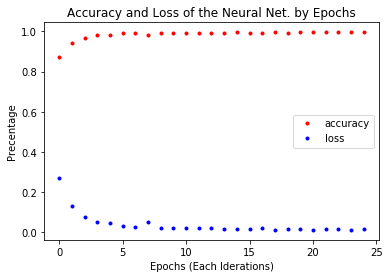

In [198]:
accuracy = fitted_model.history['accuracy']
loss = fitted_model.history['loss']
#plot accuracy for model
plt.plot(range(len(accuracy)), accuracy, 'or', marker= '.', label = 'accuracy')
#plot loss for model
plt.plot(range(len(loss)), loss, 'bo', marker= '.', label = 'loss')
plt.xlabel('Epochs (Each Iderations)')
plt.ylabel('Precentage')
plt.title('Accuracy and Loss of the Neural Net. by Epochs')
plt.legend()

## Plot Cross Validation Accuracy and Cross validation accuracy

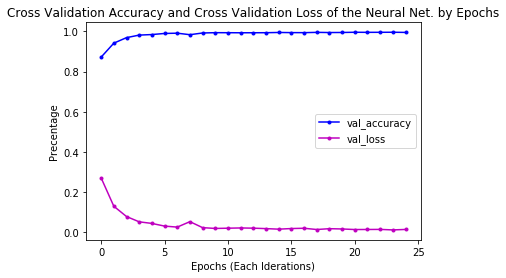

In [265]:
val_accuracy = fitted_model.history['val_accuracy']
val_loss = fitted_model.history['val_loss']
#plot cross validation accuracy for model
plt.plot(range(len(val_accuracy)), accuracy, 'b', marker= '.', label = 'val_accuracy')
#plot cross validation loss for model
plt.plot(range(len(val_loss)), loss, 'm', marker= '.', label = 'val_loss')
plt.xlabel('Epochs (Each Iderations)')
plt.ylabel('Precentage')
plt.title('Cross Validation Accuracy and Cross Validation Loss of the Neural Net. by Epochs')
plt.legend()

## Plot Cross Validation Accuracy and Cross validation accuracy

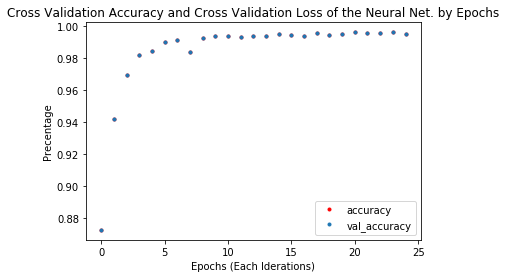

In [279]:
#plot accuracy for model
plt.plot(range(len(accuracy)), accuracy, 'or', marker= '.', label = 'accuracy')
#plot cross validation accuracy for model
plt.plot(range(len(val_accuracy)), accuracy, 'p', marker= '.', label = 'val_accuracy')
plt.xlabel('Epochs (Each Iderations)')
plt.ylabel('Precentage')
plt.title('Cross Validation Accuracy and Cross Validation Loss of the Neural Net. by Epochs')
# plt.xticks(ticks=np.arange(2,25)
plt.legend()

# Confusion Matrix

In [237]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion Matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [239]:
print(confusion_matrix(train_dir, test_dir))

ValueError: Expected array-like (array or non-string sequence), got 'geom_shapes/shapes/train'

# testing the model

In [233]:
#function for predicting category of slected image
def testing_image(image_directory):

    # loading testing image with the target size for the image
    test_image = image.load_img(image_directory, target_size = (64,64))
    
    # converts image into an array
    test_image = image.img_to_array(test_image)
    # expands array (from converted image) with a new dimension(@ first position) for calculated category
    test_image = np.expand_dims(test_image, axis = 0)
    # making prediction based on test_image and labeling it results
    result = model.predict(x = test_image)
    # printing predictions
    print(result)
    
    #display image smaller (for manual checking)
    im = image.load_img(image_directory)
    fig, ax = plt.subplots(figsize=(4,4))
    # displaying the image with figsize
    ax.imshow(im)

    # computing category weither a shape is a circle, square or triangle
    if result[0][0] == 1:
        prediction = 'Circle'
    elif result[0][1] == 1:
        prediction = 'Square'
    elif result[0][2] == 1:
        prediction = 'Triangle'
    return print(f'Predicted shape is {prediction}')
    
    
    

    
    
         
#     #display image with size (64,64)
    
#     img  = Image.open(image_directory)
# #     img = img(size = (64,64))
#     img.show()
    

## testing images not in dataset

[[0. 1. 0.]]
Predicted shape is Square


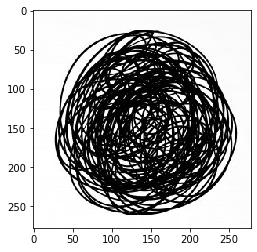

In [189]:
# print test image classified category
testing_image(test_dir + '/hand-drawn-circle-scribble.jpg')

[[1. 0. 0.]]
Predicted shape is Circle


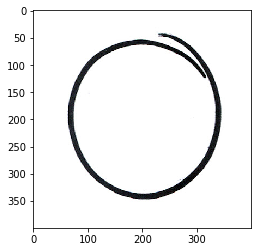

In [188]:
# print test image classified category
testing_image(test_dir + '/drawn_circle1.jpg')

[[0. 0. 1.]]
Predicted shape is Triangle


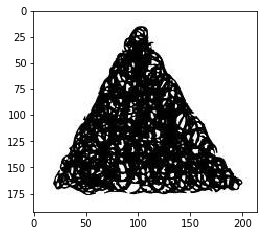

In [187]:
# print test image classified category
testing_image(test_dir + '/hand-drawn-pencil-scribble-triangles-01.jpg')

[[0. 0. 1.]]
Predicted shape is Triangle


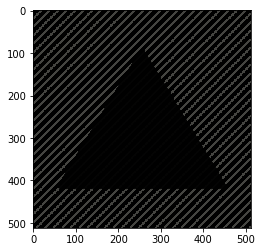

In [186]:
# print test image classified category
testing_image(test_dir + '/Triangle-3_-_Basic_UI_Glyph_Black-5-512.png')

[[0. 1. 0.]]
Predicted shape is Square


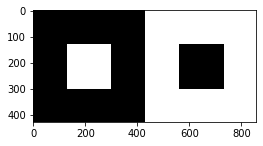

In [185]:
# print test image classified category
testing_image(test_dir+'/square-oq9l82oaujo11.jpg')

[[0. 1. 0.]]
Predicted shape is Square


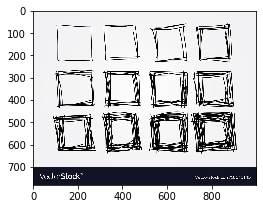

In [235]:
# print test image classified category
testing_image(f'{test_dir}/square-10045145.jpg')

[[0. 1. 0.]]
Predicted shape is Square


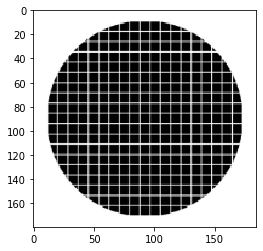

In [236]:
# print test image classified category
testing_image(test_dir + '/01_Circles_made_of_squares.png')


In [218]:
import colored
print(colored.bg("white") + colored.fg("red") + "Hello world!")

Hello world!
